# Anomalus Vertices Detection in Twitter Graph
In this notebook I am going to demonstrate how I use the method described in https://arxiv.org/abs/1610.07525 to detect anomlies in Twitter's social network.

To install the packge please read the [installion intruction](https://github.com/Kagandi/anomalous-vertices-detection).

In [8]:
from anomalous_vertices_detection.graph_learning_controller import GraphLearningController
from anomalous_vertices_detection.learners.sklearner import SkLearner
from anomalous_vertices_detection.datasets.twitter import load_data
import os
import pandas as pd

The basic installation install the packge with networkx as its graph analysis package, it is also possible to install and use iGraph

First we will define what considered as positive and negative labels

In [2]:
labels = {"neg": "Real", "pos": "Fake"}

Next we will load the graph of Twitter.
load_data will return a graph object(twitter_graph) and a config object(twitter_config).

In [3]:
twiiter_graph, twitter_config = load_data(labels_map=labels)
print(len(twiiter_graph.vertices))

Loading graph...
Data loaded.
Generating 77017 vertices.
77017 fake users generated.
847191


The reuslt will be written in result_path

In [3]:
output_folder = "../output/twitter"

Some of the extracted feature can be usefull for understanding the result but they must not be used in the ml proccess

In [6]:
if twiiter_graph.is_directed:
    meta_data_cols = ["dst", "src", "out_degree_v", "in_degree_v", "out_degree_u", "in_degree_u"]
else:
    meta_data_cols = ["dst", "src", "number_of_friends_u", "number_of_friends_v"]

Finally we are goigng to execute the classification algorithm.
The Twitter dataset is incomplete and missing a lot of data.
In order to deal with this problem we are runnig the machine learning proccess 10 times and aggregating the results.

In [1]:
for i in range(10):
    twitter_config._name = "twitter_" + str(i)
    glc = GraphLearningController(SkLearner(labels=labels), twitter_config)
    result_path = os.path.join(output_folder, twitter_config.name  + "_res.csv")
    glc.classify_by_links(twiiter_graph, result_path, test_size={"neg": 10000, "pos": 1000},
                          train_size={"neg": 20000, "pos": 20000}, meta_data_cols=meta_data_cols)

NameError: name 'glc' is not defined

In [94]:
def aggreagate_res(data_folder, res_path):
    results_frame = pd.DataFrame()
    for f in os.listdir(data_folder):
        temp_df = pd.read_csv(data_folder + "\\" + f,index_col=0)
        results_frame = results_frame.append(temp_df)
    results_frame = results_frame.groupby("src_id").mean()

    return results_frame.reset_index()

In [95]:
df = aggreagate_res(output_folder, "res.csv").sort_values("mean_link_label", ascending=False)

In [96]:
df

,src_id,neg probability,edge number,pos probability,mean_link_label,sum_link_label,predicted_label,id,actual
3595,2104351,0.037838,13.0,0.962162,1.000000,13.000000,1.000000,2104351.0,1.0
3282,955631,0.044064,18.0,0.955936,0.981481,17.666667,1.000000,955631.0,0.0
2289,352725,0.206864,13.0,0.793136,0.928205,12.066667,1.000000,352725.0,1.0
3488,1455795,0.262503,24.0,0.737497,0.858333,20.600000,1.000000,1455795.0,1.0
293,17643,0.189451,16.0,0.810549,0.825000,13.200000,1.000000,17643.0,0.0
2874,615155,0.287905,12.0,0.712095,0.794444,9.533333,1.000000,615155.0,0.0
62,5594,0.385141,14.0,0.614859,0.785714,11.000000,0.866667,5594.0,0.0
3564,1886070,0.237128,13.0,0.762872,0.779487,10.133333,0.933333,1886070.0,0.0
3485,1444212,0.234757,21.0,0.765243,0.777778,16.333333,1.000000,1444212.0,1.0
1956,262232,0.255232,19.0,0.744768,0.761404,14.466667,1.000000,262232.0,1.0


In order to calculate precision at k (How many releveant results at k) we will have to added two additional columns:
1. The sum of the positive examples.
2. k  the total number of resutls until the specific row. (row number)

In [97]:
df["actual_sum"] = df["actual"].cumsum()
df["k"] = 1
df["k"] = df["k"].cumsum()

In [98]:
df

,src_id,neg probability,edge number,pos probability,mean_link_label,sum_link_label,predicted_label,id,actual,a_sum,k
3595,2104351,0.037838,13.0,0.962162,1.000000,13.000000,1.000000,2104351.0,1.0,1.0,1
3282,955631,0.044064,18.0,0.955936,0.981481,17.666667,1.000000,955631.0,0.0,1.0,2
2289,352725,0.206864,13.0,0.793136,0.928205,12.066667,1.000000,352725.0,1.0,2.0,3
3488,1455795,0.262503,24.0,0.737497,0.858333,20.600000,1.000000,1455795.0,1.0,3.0,4
293,17643,0.189451,16.0,0.810549,0.825000,13.200000,1.000000,17643.0,0.0,3.0,5
2874,615155,0.287905,12.0,0.712095,0.794444,9.533333,1.000000,615155.0,0.0,3.0,6
62,5594,0.385141,14.0,0.614859,0.785714,11.000000,0.866667,5594.0,0.0,3.0,7
3564,1886070,0.237128,13.0,0.762872,0.779487,10.133333,0.933333,1886070.0,0.0,3.0,8
3485,1444212,0.234757,21.0,0.765243,0.777778,16.333333,1.000000,1444212.0,1.0,4.0,9
1956,262232,0.255232,19.0,0.744768,0.761404,14.466667,1.000000,262232.0,1.0,5.0,10


We will added additional column taht actualy will store the p@k values by calculating the precision at k.

In [99]:
df["p@k"] = df.apply(lambda x: x["actual_sum"]/x["k"], axis=1)

In [100]:
df[["k", "p@k"]]

,k,p@k
3595,1,1.000000
3282,2,0.500000
2289,3,0.666667
3488,4,0.750000
293,5,0.600000
2874,6,0.500000
62,7,0.428571
3564,8,0.375000
3485,9,0.444444
1956,10,0.500000


We can see in the p@k plot that the resuts are musch better then random which about 6%.

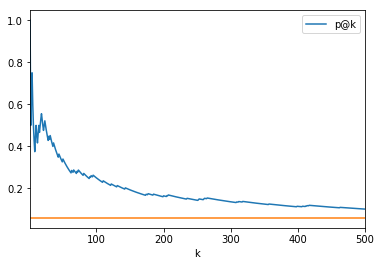

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
df[["k", "p@k"]][:500].plot(x="k", y= "p@k")
plt.plot(df[["k"]].values, np.full((len(df[["k"]]),1), 0.06))